In [2]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
import warnings
warnings.filterwarnings('ignore')
nltk.download('stopwords')
nltk.download('wordnet')

/Users/valery/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/valery/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/valery/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/valery/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
df = pd.read_csv('estimated_df.csv')

In [113]:
df[df['channel'] == 'WP']

,Unnamed: 0,id,text,desc,publ,views,likes,comments,time,url,channel,finBERT,textblob_polarity,vader_compound,date,time_sec
636280,636280,636283,"As companies take sides, does it matter where ...",One thing we can control is how we spend our m...,2025-01-31 23:49:02,918.0,18.0,4.0,00:22:29,https://www.youtube.com/watch?v=5AH8xZ3jMtU,WP,Neutral,0.000000,0.0258,2025-01-31,1349
636281,636281,636284,More Trump chaos and key confirmation fights,Trump’s extraordinary news conference on the p...,2025-01-31 23:44:55,924.0,14.0,6.0,00:32:41,https://www.youtube.com/watch?v=Gfm1_ov4GFI,WP,Neutral,0.250000,-0.7703,2025-01-31,1961
636282,636282,636285,“The vibes have been immaculate” for Trump. Un...,Trump’s extraordinary news conference on the p...,2025-01-31 23:48:26,4146.0,51.0,24.0,00:32:39,https://www.youtube.com/watch?v=Wi3kacEROi8,WP,Neutral,0.000000,0.0000,2025-01-31,1959
636283,636283,636286,"Friday, January 31, 2025",Friday briefing: D.C. plane crash updates; Tru...,2025-01-31 15:40:22,1563.0,68.0,3.0,00:09:54,https://www.youtube.com/watch?v=MVSA1XVs27c,WP,Neutral,0.000000,0.0000,2025-01-31,594
636284,636284,636287,"Trump: ‘No plans’ on visiting site, will visit...","President Donald Trump on Jan. 30, told report...",2025-01-31 01:48:53,9110.0,51.0,103.0,00:00:21,https://www.youtube.com/watch?v=z2aSsLBAEDw,WP,Neutral,0.000000,-0.3182,2025-01-31,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649680,649680,649683,Why the Nationals want Bud Black as their new ...,Washington Nationals reporter Chelsea Janes di...,2015-11-02 03:05:45,1467.0,3.0,1.0,00:01:41,https://www.youtube.com/watch?v=0eXA6J-v3ag,WP,Neutral,-0.015152,0.0772,2015-11-02,101
649681,649681,649684,"2015-2016 NBA preview: The overrated, underrat...",Washington Post sports columnist Kevin Blackis...,2015-11-02 03:04:45,185.0,0.0,0.0,00:01:56,https://www.youtube.com/watch?v=WgWKY_9l-5c,WP,Neutral,0.000000,0.0000,2015-11-02,116
649682,649682,649685,NBA preview: Awards predictions,Washington Post sports columnist Kevin Blackis...,2015-11-02 03:04:06,260.0,1.0,0.0,00:02:08,https://www.youtube.com/watch?v=Qz4SSXq235Q,WP,Neutral,0.000000,0.4588,2015-11-02,128
649683,649683,649686,Who is Paul Ryan?,Here's what you need to know about Rep. Paul R...,2015-11-02 02:59:02,880.0,4.0,0.0,00:01:06,https://www.youtube.com/watch?v=PIDb16fl9Zo,WP,Neutral,0.000000,0.0000,2015-11-02,66


# Описательная статистика по данным

Максимальная и минимальная дата данных ---> обрезать до 1 ноября 2015 и после 31 января 2025 включительно

In [6]:
# Для начала приведу к типу даты дату публикации
df['publ'] = pd.to_datetime(df['publ'])

In [7]:
# Сделаем колонку, где будет только день (чтобы оценить в рамках дня негатив какой был)
df['date'] = pd.to_datetime(df['publ'].dt.date)

In [8]:
df.head()

,Unnamed: 0,id,text,desc,publ,views,likes,comments,time,url,channel,finBERT,textblob_polarity,vader_compound,date
0,0,0,Brownstein: ‘No question’ US consumers will ul...,President Donald Trump announced extraordinary...,2025-02-03 03:52:12,263871.0,2246.0,3682.0,00:09:15,https://www.youtube.com/watch?v=L10MzJQRM-I,CNN,Neutral,0.000000,-0.1027,2025-02-03
1,1,1,‘Absolutely disgraceful’: Ex-FBI official on D...,Former FBI deputy director and CNN law enforce...,2025-02-03 02:55:43,264573.0,4223.0,3456.0,00:08:13,https://www.youtube.com/watch?v=gsch-Nh6G6w,CNN,Negative,0.200000,-0.1027,2025-02-03
2,2,2,Epidemiologist reacts to removal of certain he...,Several US Centers for Disease Control and Pre...,2025-02-02 17:22:38,70618.0,997.0,1304.0,00:06:06,https://www.youtube.com/watch?v=v7LfmcDSo0o,CNN,Neutral,0.214286,0.2732,2025-02-02
3,3,3,"More Planes, Fewer Air Traffic Controllers: Re...",In the days since the deadly midair collision ...,2025-02-02 12:40:58,12275.0,133.0,329.0,00:19:53,https://www.youtube.com/watch?v=HxO7w_AullQ,CNN,Negative,0.500000,-0.6249,2025-02-02
4,4,4,RFK Jr. Under Fire,RFK Jr.'s confirmation hearing raised more que...,2025-02-01 19:00:54,91546.0,686.0,1201.0,00:01:44,https://www.youtube.com/watch?v=oFMttTfu5Rw,CNN,Neutral,0.000000,-0.3400,2025-02-01


<h1>Выгрузка данных с YouTube была реализована в 2 этапа:</h1>

<p><strong>Этап 1:</strong> Выгрузка всех видео за последние 12 лет с использованием библиотеки <a href="https://github.com/AlejoASotelo/ScrapeTube" target="_blank">ScrapeTube</a>.</p>

<p><strong>Этап 2:</strong> Выгрузка статистики видео через <a href="https://developers.google.com/youtube/v3/getting-started" target="_blank">YouTube API</a>. Получены данные о количестве просмотров, лайков, дизлайков, комментариев и другие показатели.</p>

In [9]:
df.groupby('channel')['date'].agg(['min', 'max'])

,min,max
channel,,
ABC,2013-02-03,2025-02-03
BBC,2013-08-13,2025-02-02
CBCTheNational,2013-02-04,2025-02-03
CBSE,2013-06-19,2025-02-02
CNBC,2013-08-29,2025-02-01
CNN,2013-02-03,2025-02-03
DWNews,2013-02-03,2025-02-03
EuroNews,2013-02-03,2025-02-03
Firstpost,2022-07-20,2025-02-03


<p>Цель исследования включает в себя охват периода с 2015 по 2016 год, поэтому, ориентируясь на доступную статистику по каналам, возьмем данные с 1 ноября 2015 (1 год до выборов в США) по 31 января 2025 (инаугурация Трампа).</p>
<p>Уберем тогда и каналы, которые не имели статистики в этот период: Firstpost и Reuters.</p>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973717 entries, 0 to 973716
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Unnamed: 0         973717 non-null  int64         
 1   id                 973717 non-null  int64         
 2   text               973717 non-null  object        
 3   desc               972763 non-null  object        
 4   publ               973717 non-null  datetime64[ns]
 5   views              973717 non-null  float64       
 6   likes              973717 non-null  float64       
 7   comments           973717 non-null  float64       
 8   time               973717 non-null  object        
 9   url                973717 non-null  object        
 10  channel            973717 non-null  object        
 11  finBERT            973717 non-null  object        
 12  textblob_polarity  973717 non-null  float64       
 13  vader_compound     973717 non-null  float64 

In [11]:
print(f'Количнство наблюдений: {df.shape[0]} \nКоличество колонок: {df.shape[1]}')

Количнство наблюдений: 973717 
Количество колонок: 15


In [12]:
df = df[(df['date'] >= '2015-11-01') & (df['date'] <= '2025-01-31') &    # скорректировали период
        (df['channel'] != 'Firstpost') & (df['channel'] != 'Reuters')] # Убрали First Post и Reuters

In [15]:
df['channel'].unique()

array(['CNN', 'BBC', 'ABC', 'SkyNews', 'NBC', 'FoxNews', 'CBSE', 'CNBC',
       'MSNBC', 'USATODAY', 'CBCTheNational', 'WP', 'Telegraph',
       'InsideEdition', 'EuroNews', 'VOANews', 'DWNews', 'GMA', 'WSJ'],
      dtype=object)

In [66]:
df.head(1)

,Unnamed: 0,id,text,desc,publ,views,likes,comments,time,url,channel,finBERT,textblob_polarity,vader_compound,date,time_sec
12,12,12,What expert noticed in new videos of plane col...,CNN aviation analyst Miles O'Brien breaks down...,2025-01-31 22:56:40,457044.0,3571.0,2174.0,00:10:02,https://www.youtube.com/watch?v=CwxCpCe6zp4,CNN,Neutral,0.136364,-0.3612,2025-01-31,602


In [69]:
# Группируем данные по дате и агрегируем показатели
df_stat1 = df.groupby('date').agg(
    Количество_наблюдений=('date', 'size'),
    Количество_лайков=('likes', 'sum'),
    Количество_просмотров=('views', 'sum'),
    Количество_комментариев=('comments', 'sum')
).reset_index()

# Переименовываем столбец с датой для соответствия исходному варианту
df_stat1 = df_stat1.rename(columns={'date': 'Дата'})

In [70]:
df_stat1

,Дата,Количество_наблюдений,Количество_лайков,Количество_просмотров,Количество_комментариев
0,2015-11-01,80,6422.0,1485970.0,3729.0
1,2015-11-02,193,128031.0,16067613.0,12496.0
2,2015-11-03,245,86415.0,17227867.0,16733.0
3,2015-11-04,234,665418.0,46140014.0,88420.0
4,2015-11-05,220,233005.0,22225371.0,31917.0
...,...,...,...,...,...
3375,2025-01-27,225,491180.0,30391714.0,178863.0
3376,2025-01-28,299,701628.0,37682406.0,237458.0
3377,2025-01-29,294,727960.0,41585500.0,224315.0
3378,2025-01-30,349,564753.0,41542329.0,200629.0


В рамках исследования интересны данные, которые не содержат выбросов, включая количество видео, выпущенное за 1 день.

In [74]:
df_statata = df_stat1[df_stat1['Количество_наблюдений'] >= 1000]
df_statata.columns = ['Дата', 'Количество наблюдений (>1000)', 
                      'Количество лайков', 'Количество просмотров', 
                      'Количество комментариев']
df_statata.to_csv('sklvmjkfv.csv')

In [33]:
df.head(2)
# Максимум лайков, максимум комментов, максимум просмотров, максимальная продолжительность видео
# Минимум лайков, минимум комментов, минимум просмотров, минимальная продолжительность видео

,Unnamed: 0,id,text,desc,publ,views,likes,comments,time,url,channel,finBERT,textblob_polarity,vader_compound,date,time_sec
12,12,12,What expert noticed in new videos of plane col...,CNN aviation analyst Miles O'Brien breaks down...,2025-01-31 22:56:40,457044.0,3571.0,2174.0,00:10:02,https://www.youtube.com/watch?v=CwxCpCe6zp4,CNN,Neutral,0.136364,-0.3612,2025-01-31,602
13,13,13,Flight simulator shows what flying into Reagan...,CNN's Jason Carroll went inside a flight simul...,2025-01-31 21:56:24,198417.0,1346.0,500.0,00:09:21,https://www.youtube.com/watch?v=LJeNtmlGcbY,CNN,Neutral,0.000000,0.3612,2025-01-31,561


In [32]:
# Функция для конвертации времени в секунды
def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

# Применение функции к колонке "Время"
df['time_sec'] = df['time'].apply(time_to_seconds)

Описательная статистика:

In [75]:
import pandas as pd
import numpy as np
from tabulate import tabulate

# Вычисление описательной статистики
stats = {
    "Показатель": ["Лайки", "Просмотры", "Комментарии", "Продолжительность видео (секунды)"],
    "Среднее значение": [
        df["likes"].mean(),
        df["views"].mean(),
        df["comments"].mean(),
        df["time_sec"].mean()
    ],
    "Медиана": [
        df["likes"].median(),
        df["views"].median(),
        df["comments"].median(),
        df["time_sec"].median()
    ],
    "Максимальное значение": [
        df["likes"].max(),
        df["views"].max(),
        df["comments"].max(),
        df["time_sec"].max()
    ],
    "Минимальное значение": [
        df["likes"].min(),
        df["views"].min(),
        df["comments"].min(),
        df["time_sec"].min()
    ],
    "Стандартное отклонение": [
        df["likes"].std(),
        df["views"].std(),
        df["comments"].std(),
        df["time_sec"].std()
    ]
}

# Создание DataFrame для описательной статистики
stats_df = pd.DataFrame(stats)
stats_df.to_csv('dadadad.csv')

In [21]:
df['date'] = df['timestamp']

Проверим, неужели правда столько наблюдений за 1 день.

Да, в тот день CNN опубликовали много видео и нужно будет это учитывать в исследовании.

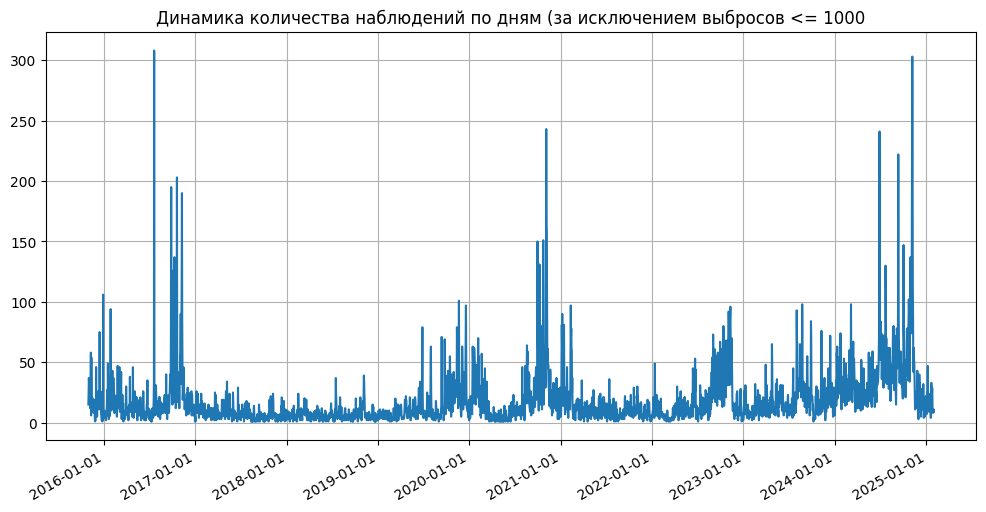

In [22]:
# Подсчет количества наблюдений по дням
counts = df['date'].value_counts().sort_index()

# Фильтрация данных: оставляем только те даты, где количество наблюдений <= 3
filtered_counts = counts[counts <= 1000]

# Создание графика
plt.figure(figsize=(12, 6))  # Настраиваем размер графика (опционально)
plt.plot(filtered_counts.index, filtered_counts.values, linestyle='-')
plt.title('Динамика количества наблюдений по дням (за исключением выбросов <= 1000', size = 12)
plt.grid(True) # Добавляем сетку (опционально)

# Форматирование оси X для дат (опционально)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())
plt.gcf().autofmt_xdate()  # Поворачиваем подписи на оси X для читаемости

plt.show()


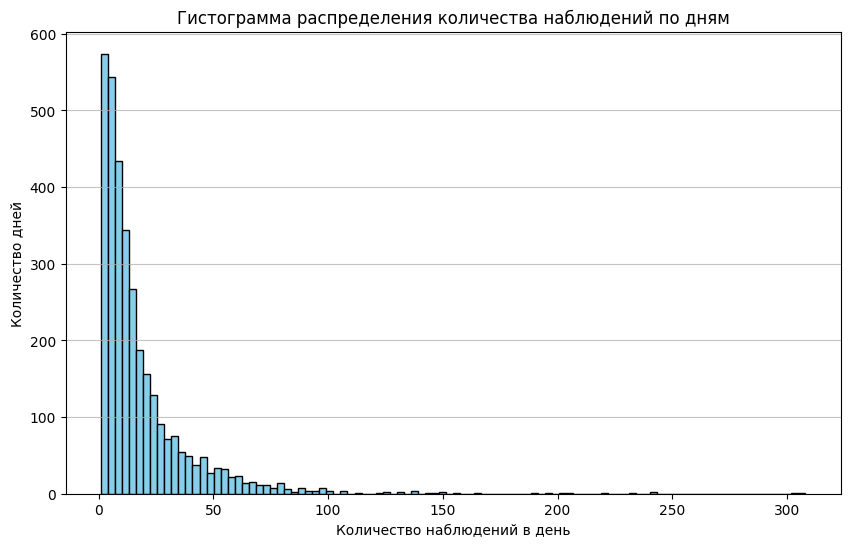

In [23]:
# Создание гистограммы
plt.figure(figsize=(10, 6)) # Размер графика
# Учтем, что если показывать на гистограмме все, то визуально пострадает картинка
plt.hist(counts[counts <= 600].values, bins=100, color='skyblue', edgecolor='black') # bins - кол-во столбцов
plt.xlabel('Количество наблюдений в день')
plt.ylabel('Количество дней')
plt.title('Гистограмма распределения количества наблюдений по дням')
plt.grid(axis='y', alpha=0.75)  # Сетка только по оси Y
plt.show()

In [24]:
grouped_data = df.groupby('date').agg({
    'likes': 'sum',
    'comments': 'sum',
    'views': 'sum'
})

In [25]:
grouped_data = grouped_data/1000

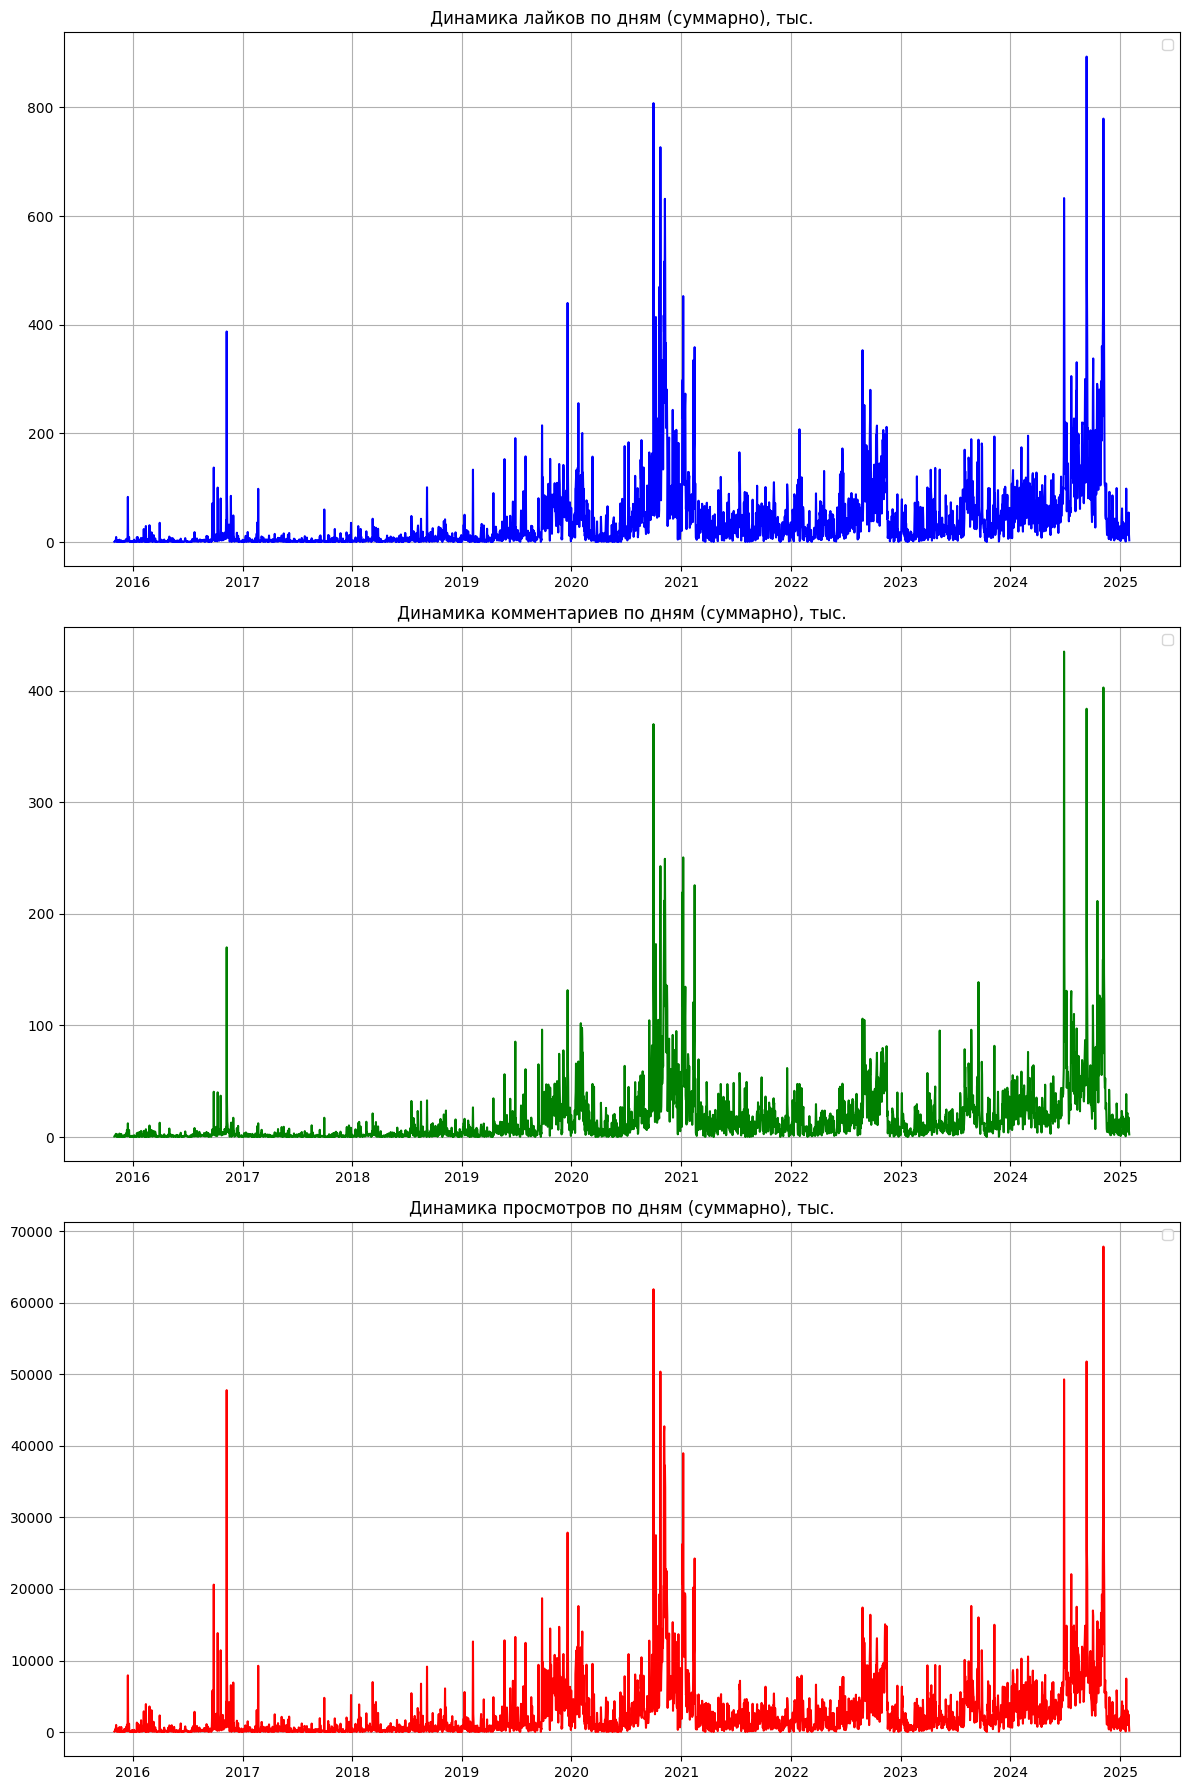

In [26]:
# 3. Создание графиков
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
# График для лайков
axes[0].plot(grouped_data.index, grouped_data['likes'], color='blue')
axes[0].set_title('Динамика лайков по дням (суммарно), тыс.', size = 12)
axes[0].legend()
axes[0].grid(True)
# График для комментариев
axes[1].plot(grouped_data.index, grouped_data['comments'], color='green')
axes[1].set_title('Динамика комментариев по дням (суммарно), тыс.', size = 12)
axes[1].legend()
axes[1].grid(True)
# График для просмотров
axes[2].plot(grouped_data.index, grouped_data['views'], color='red')
axes[2].set_title('Динамика просмотров по дням (суммарно), тыс.', size = 12)
axes[2].legend()
axes[2].grid(True)
# Автоматическая корректировка расположения графиков
plt.tight_layout()
# Отображение графиков
plt.show()

In [99]:
df.head(4)

,Unnamed: 0,id,text,desc,publ,views,likes,comments,time,url,channel,finBERT,textblob_polarity,vader_compound,date,time_sec
12,12,12,What expert noticed in new videos of plane col...,CNN aviation analyst Miles O'Brien breaks down...,2025-01-31 22:56:40,457044.0,3571.0,2174.0,00:10:02,https://www.youtube.com/watch?v=CwxCpCe6zp4,CNN,Neutral,0.136364,-0.3612,2025-01-31,602
13,13,13,Flight simulator shows what flying into Reagan...,CNN's Jason Carroll went inside a flight simul...,2025-01-31 21:56:24,198417.0,1346.0,500.0,00:09:21,https://www.youtube.com/watch?v=LJeNtmlGcbY,CNN,Neutral,0.000000,0.3612,2025-01-31,561
14,14,14,FAA indefinitely closes helicopter routes near...,The low-altitude helicopter corridor that was ...,2025-01-31 19:43:11,76841.0,774.0,577.0,00:10:11,https://www.youtube.com/watch?v=qCAvVXwDGgs,CNN,Neutral,0.100000,0.0000,2025-01-31,611
15,15,15,Disabled pilot reacts to Trump’s comments on d...,CNN aviation analyst Miles O'Brien joins CNN's...,2025-01-31 18:30:34,144727.0,2244.0,2007.0,00:10:50,https://www.youtube.com/watch?v=mOHCfxhRgBg,CNN,Neutral,-0.200000,-0.4019,2025-01-31,650


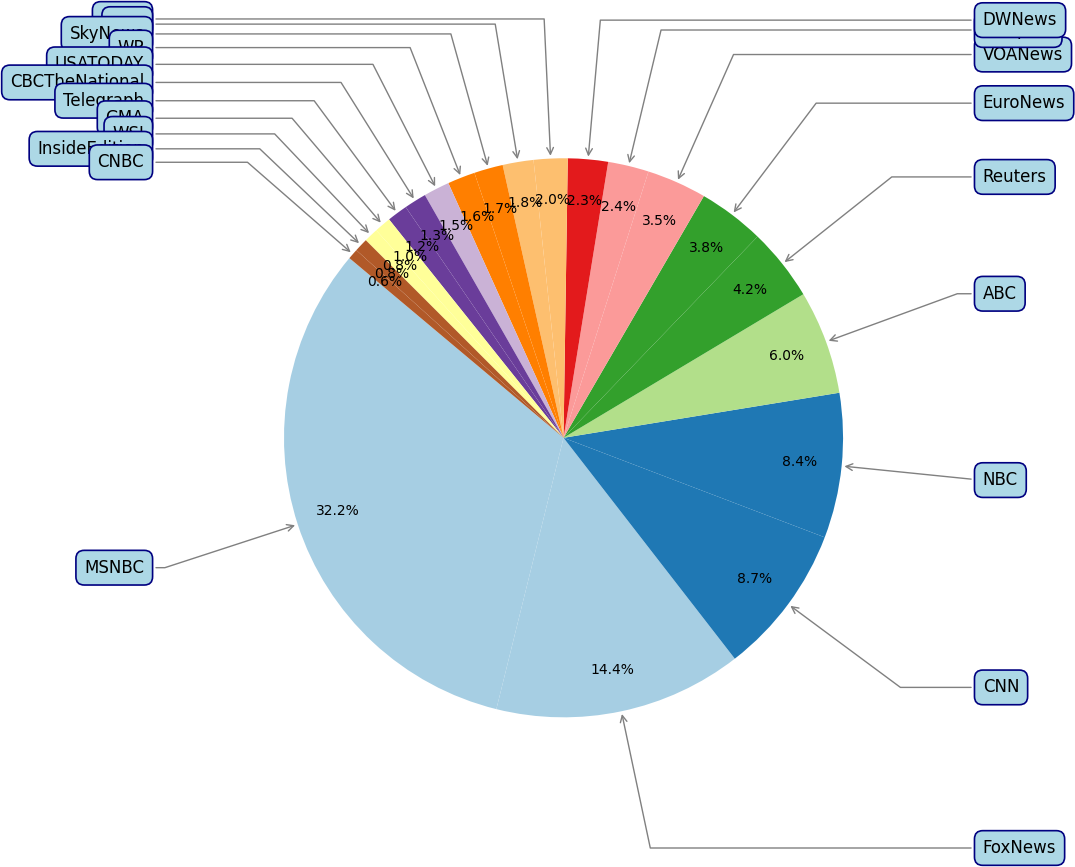

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Создание фигуры
fig, ax = plt.subplots(figsize=(12, 12))

# Функция для аннотирования секторов диаграммы
def label_wedges_enhanced(wedges, texts, autotexts, labels):
    bbox_props = dict(boxstyle="round,pad=0.5", fc="lightblue", ec="navy", lw=1.2)
    kw = dict(arrowprops=dict(arrowstyle="->", color="gray"),
              bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.5*np.sign(x), 1.5*y),
                    horizontalalignment=horizontalalignment, fontsize=12, **kw)

# Добавление цветовой палитры для визуализации
colors = plt.cm.Paired(np.linspace(0, 1, len(df['channel'].value_counts())))

# Построение круговой диаграммы
wedges, texts, autotexts = ax.pie(
    df['channel'].value_counts(),
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=colors,
    textprops={'fontsize': 10, 'color': 'black'}
)

# Получение меток каналов
labels = df['channel'].value_counts().index

# Аннотирование секторов диаграммы
label_wedges_enhanced(wedges, texts, autotexts, labels)

# Добавление заголовка и легенды
# ax.set_title("Распределение каналов", fontsize=16, fontweight="bold")
# ax.legend(wedges, labels, title="Channels", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=10)

# Убираем стандартные метки
ax.set(xticks=[], yticks=[])

# Автоматическая корректировка расположения графика
plt.axis('equal')
plt.tight_layout()
plt.show()


# <STRONG>Фильтрация текста</STRONG>

## <STRONG>1 Этап</STRONG>. Разработка списка контрольных слов.

Для фильтрации будут использованы слова, связанные с темой "Выборы" с 2016 года. То есть в него войдут кандидаты от демократической и республиканской партии, а также сами слова "election", "vote", "debate", "president", "candidate", "impeachment". Кандидаты: "joe", "biden", "donald", "trump", "camala", "harris", "hillary", "clinton".

Но перед фильтрацией необходимо проверить, как часто они встречаются в общем объеме публикаций и в колонке с названием видео и в описании.

In [ ]:
# Инициализация лемматизатора
lemmatizer = WordNetLemmatizer()

# Функция для лемматизации с указанием части речи
def lemmatize_word(word, pos):
    if pos.startswith('J'):
        return lemmatizer.lemmatize(word, pos='a')  # Прилагательное
    elif pos.startswith('V'):
        return lemmatizer.lemmatize(word, pos='v')  # Глагол
    elif pos.startswith('N'):
        return lemmatizer.lemmatize(word, pos='n')  # Существительное
    elif pos.startswith('R'):
        return lemmatizer.lemmatize(word, pos='r')  # Наречие
    else:
        return word

# Функция для обработки текста
def process_text(text):
    if not isinstance(text, str):  # Проверка: если не строка, преобразовать в строку
        text = str(text)

    # Удаление знаков препинания и цифр
    text = re.sub(r'[^\w\s]', '', text)

    # Токенизация и получение частей речи
    words = word_tokenize(text)
    tagged = pos_tag(words)

    # Лемматизация слов
    lemmatized_words = [lemmatize_word(word, pos) for word, pos in tagged]

    # Удаление стоп-слов
    stop_words = set(stopwords.words('english'))
    filtered_words = [word.lower() for word in lemmatized_words if word.lower() not in stop_words]

    return filtered_words

# Обработка датафрейма
def process_dataframe(df):
    # Объединение текстов из двух колонок
    all_text = df['text'].tolist() + df['desc'].tolist()

    all_words = []
    for text in all_text:
        words = process_text(text)
        all_words.extend(words)

    # Подсчет частоты слов
    word_freq = pd.Series(all_words).value_counts().reset_index()
    word_freq.columns = ['Слово', 'Количество']

    return word_freq

result_df = process_dataframe(df) # Получаем таблицу с колонками "Слово" и "Количество"

In [ ]:
result_df.head(5)

In [ ]:
result_df[result_df['Слово'] in ["election", "vote", "debate", "president", 
                                 "candidate", "impeachment", "joe", "biden", 
                                 "donald", "trump", "camala", "harris", "hillary", "clinton"]]

## <STRONG>2 Этап.</STRONG> Фильтрация на основе мешка слов.

In [ ]:
# Инициализация лемматизатора и стоп-слов
# Список слов для поиска
target_words = ['joe', 'biden', 
                'donald', 'trump', 
                'camala', 'harris', 
                'hillary', 'clinton',
                'election', 'vote', 'debate', 'president', 'candidate', 'impeachment']

# Инициализация лемматизатора и стоп-слов
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Функция для обработки текста
def process_text(text):
    if pd.isnull(text):  # Проверка на NaN
        return []
    
    # Приводим к нижнему регистру
    text = text.lower()
    
    # Разбиваем на слова
    words = nltk.word_tokenize(text)
    
    # Удаляем стоп-слова и лемматизируем
    processed_words = []
    for word, pos in nltk.pos_tag(words):
        if word not in stop_words:
            # Приводим к начальной форме
            if pos.startswith('J'):
                word = lemmatizer.lemmatize(word, pos='a')
            elif pos.startswith('V'):
                word = lemmatizer.lemmatize(word, pos='v')
            elif pos.startswith('N'):
                word = lemmatizer.lemmatize(word, pos='n')
            elif pos.startswith('R'):
                word = lemmatizer.lemmatize(word, pos='r')
            processed_words.append(word)
    
    return processed_words

# Функция для проверки наличия слов из списка
def check_words(row):
    text_words = process_text(row['text'])
    desc_words = process_text(row['desc'])
    
    for target_word in target_words:
        for word in text_words + desc_words:
            if target_word in word:
                return True
    
    return False

# Применение функции к DataFrame
df_filtered = df[df.apply(check_words, axis=1)]

Отфильтрованный дата фрейм:

In [623]:
df_est

,Unnamed: 0.1,Unnamed: 0,id,text,desc,publ,views,likes,comments,time,url,channel,finBERT,textblob_polarity,vader_compound
0,0,0,0,Brownstein: ‘No question’ US consumers will ul...,President Donald Trump announced extraordinary...,2025-02-03 03:52:12,263871.0,2246.0,3682.0,00:09:15,https://www.youtube.com/watch?v=L10MzJQRM-I,CNN,Neutral,0.000000,-0.1027
1,1,1,1,‘Absolutely disgraceful’: Ex-FBI official on D...,Former FBI deputy director and CNN law enforce...,2025-02-03 02:55:43,264573.0,4223.0,3456.0,00:08:13,https://www.youtube.com/watch?v=gsch-Nh6G6w,CNN,Negative,0.200000,-0.1027
2,2,2,2,Epidemiologist reacts to removal of certain he...,Several US Centers for Disease Control and Pre...,2025-02-02 17:22:38,70618.0,997.0,1304.0,00:06:06,https://www.youtube.com/watch?v=v7LfmcDSo0o,CNN,Neutral,0.214286,0.2732
3,5,5,5,Is Elon Musk calling the shots in Trump’s Gove...,The buyout offer that went to all federal gove...,2025-02-01 18:30:04,139081.0,1356.0,2128.0,00:04:56,https://www.youtube.com/watch?v=7l8v0W2ljzM,CNN,Neutral,0.000000,0.0000
4,8,8,8,Frank Luntz: Trump voters tired of being accus...,#CNN #News,2025-02-01 16:00:19,348450.0,5299.0,10026.0,00:09:02,https://www.youtube.com/watch?v=AqZyhWMAZuQ,CNN,Neutral,-0.400000,-0.8481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328371,973674,973674,973677,'Wolf of Wall Street': Jordan Belfort Prosecut...,"Gibson, Dunn & Crutcher Partner Joel Cohen on ...",2014-01-02 23:22:33,82279.0,101.0,83.0,00:03:12,https://www.youtube.com/watch?v=ObeQCwrggLY,WSJ,Neutral,0.000000,0.0000
328372,973681,973681,973684,Photos of the Day - World Prepares For A New Year,"In today's pictures, traders wear glasses cele...",2014-01-01 01:24:36,2661.0,17.0,0.0,00:01:42,https://www.youtube.com/watch?v=S3ETQbqHcvQ,WSJ,Neutral,0.136364,0.0000
328373,973683,973683,973686,Obama's 2014 Test: Confront or Bargain with GOP,President Barack Obama exits 2013 in the weake...,2013-12-31 20:43:15,2587.0,8.0,1.0,00:03:58,https://www.youtube.com/watch?v=2gJsn26g4FM,WSJ,Neutral,0.000000,0.0258
328374,973702,973702,973705,"Car Bomb Rips Through Beirut, and More",An explosion kills former finance minister Moh...,2013-12-27 20:51:53,8652.0,13.0,0.0,00:01:56,https://www.youtube.com/watch?v=qLgJ68vPZis,WSJ,Neutral,0.500000,-0.4939


# Индекс выборов в США

In [3]:
df_est = pd.read_csv('final_after_presidents_elect.csv', sep = '§') # Импорт слов после очистки

In [4]:
df_est

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,text,desc,publ,views,likes,comments,time,url,channel,finBERT,textblob_polarity,vader_compound,timestamp
0,1,79,79,79,Retired general on the challenges he thinks He...,The Senate narrowly voted to confirm embattled...,2025-01-26 05:30:12,110962.0,858.0,891.0,00:09:17,https://www.youtube.com/watch?v=JWK-rMf-pO0,CNN,Neutral,0.05,0.2023,2025-01-26
1,3,86,86,86,Pete Hegseth narrowly confirmed as defense sec...,The Senate narrowly voted to confirm embattled...,2025-01-25 14:00:41,65940.0,542.0,1375.0,00:10:15,https://www.youtube.com/watch?v=WC6JDFn0GIw,CNN,Neutral,0.40,0.1280,2025-01-25
2,5,88,88,88,Trump makes a political demand for California ...,President Donald Trump said he wanted Californ...,2025-01-24 22:00:10,188690.0,1748.0,3958.0,00:07:11,https://www.youtube.com/watch?v=r5wGWuD-JyY,CNN,Negative,0.00,-0.6808,2025-01-24
3,7,132,132,132,Hear ex-Capitol officer's message to Trump vot...,"Michael Fanone, a former DC police officer who...",2025-01-21 16:30:06,1478120.0,41679.0,18707.0,00:05:51,https://www.youtube.com/watch?v=AwSuAH7B9-Y,CNN,Neutral,0.00,-0.2732,2025-01-21
4,8,140,140,140,'Catastrophic' cuts could hit Trump's base,Some low-income communities that voted for Tru...,2025-01-20 16:54:45,319917.0,5399.0,4744.0,00:05:49,https://www.youtube.com/watch?v=68iPQvDERuk,CNN,Negative,-0.80,-0.6597,2025-01-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61698,94591,965907,965907,965910,What to Look For in Saturday's Democratic Debate,Will Martin O'Malley and Bernie Sanders step u...,2015-11-13 23:39:22,2491.0,4.0,11.0,00:01:22,https://www.youtube.com/watch?v=bc0MOtCIVLQ,WSJ,Neutral,0.00,0.0000,2015-11-13
61699,94594,965935,965935,965938,One-on-One With Trump Post-Debate,Republican presidential candidate Donald Trump...,2015-11-12 00:35:57,3371.0,35.0,6.0,00:02:06,https://www.youtube.com/watch?v=yZQGmBpGZaM,WSJ,Neutral,0.00,0.0000,2015-11-12
61700,94601,965963,965963,965966,High Stakes for Jeb Bush at GOP Debate,What can Republican presidential candidate Jeb...,2015-11-10 22:12:56,664.0,3.0,2.0,00:03:09,https://www.youtube.com/watch?v=0R4e7VtoH9w,WSJ,Neutral,0.16,0.0000,2015-11-10
61701,94615,966064,966064,966067,What's Next for Turkey?,Turkey’s voters have embraced single party rul...,2015-11-02 22:08:27,511.0,4.0,1.0,00:01:32,https://www.youtube.com/watch?v=wJj1TtNUiAE,WSJ,Neutral,0.00,0.0000,2015-11-02


In [5]:
# Преобразование в тип datetime
df_est['timestamp'] = pd.to_datetime(df_est['publ'])
# Создание колонки для даты
df_est['timestamp'] = df_est['timestamp'].dt.date

In [6]:
df_est['timestamp'] = pd.to_datetime(df_est['timestamp'])

In [7]:
df_est = df_est.iloc[:,2:]

In [8]:
dates = pd.to_datetime(df_est['timestamp'])
min_date = dates.min()
max_date = dates.max()
full_dates = pd.date_range(start=min_date, end=max_date, freq='D')
missing_dates = full_dates[~full_dates.isin(dates)]
print(missing_dates)

DatetimeIndex(['2015-12-25', '2015-12-26', '2016-12-25', '2017-08-26',
               '2017-09-03', '2017-09-04', '2017-11-24', '2018-01-01',
               '2018-01-07', '2018-02-10', '2018-04-08', '2018-04-14',
               '2018-04-30', '2018-06-10', '2018-06-11', '2018-07-22',
               '2018-09-02', '2018-09-03', '2018-09-16', '2018-10-14',
               '2018-11-23', '2018-11-25', '2019-01-13', '2019-03-02',
               '2019-07-07', '2019-07-08', '2019-08-04', '2019-08-18',
               '2020-03-30', '2020-05-10', '2020-05-25', '2020-05-31',
               '2020-07-04', '2020-12-26', '2021-07-26', '2021-08-15',
               '2021-08-23', '2021-08-30', '2021-11-27', '2022-01-03',
               '2022-02-21', '2022-03-13', '2022-03-16', '2022-03-20',
               '2022-05-27', '2022-06-05', '2022-12-26'],
              dtype='datetime64[ns]', freq=None)


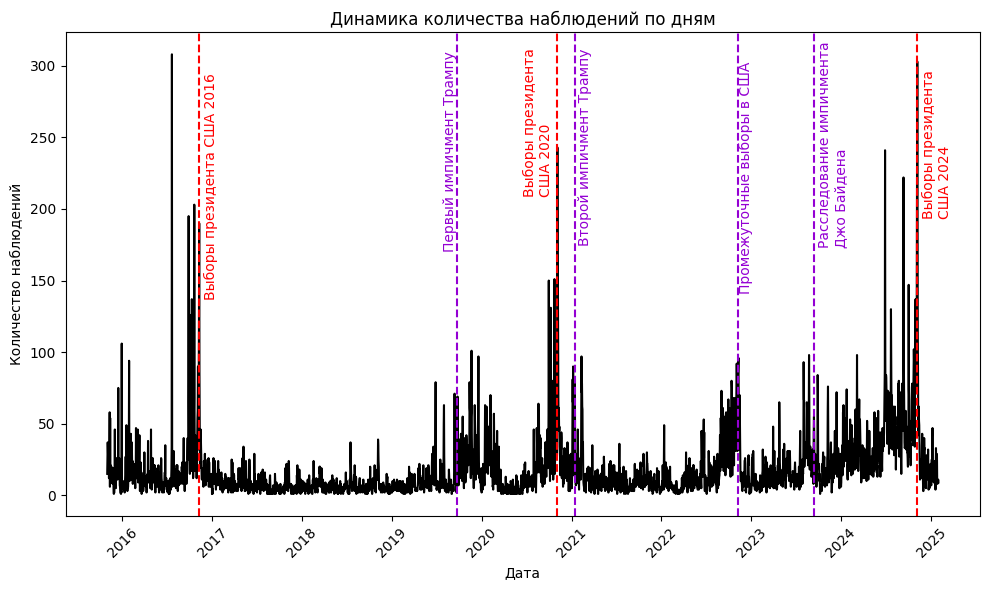

In [9]:
# Подсчет количества наблюдений по дням
counts = pd.DataFrame(df_est[(df_est['timestamp'] >= '2015-11-01') & (df_est['timestamp'] <= '2025-01-31')]['timestamp'].value_counts().sort_index())
counts.columns = ['count']
# Преобразование индекса в datetime
counts.index = pd.to_datetime(counts.index)

# Создание графика
plt.figure(figsize=(10, 6))
plt.plot(counts.index, counts['count'], color = 'black')
plt.xlabel('Дата')
plt.ylabel('Количество наблюдений')
plt.title('Динамика количества наблюдений по дням')
plt.xticks(rotation=45)

plt.axvline(x=pd.to_datetime('2016-11-08'), color='red', linestyle='--', label='Выборы президента США')
plt.text(x=pd.to_datetime('2016-11-08') + pd.Timedelta(days=20), y=counts['count'].max() * 0.7,  # Корректировка позиции текста
         s='Выборы президента США 2016',
         color='red',
         rotation=90,
         verticalalignment='center',
         horizontalalignment='left')

plt.axvline(x=pd.to_datetime('2020-11-03'), color='red', linestyle='--')
plt.text(x=pd.to_datetime('2020-11-03') + pd.Timedelta(days=-140), y=counts['count'].max() * 0.85, # Корректировка позиции текста
         s='Выборы президента \nСША 2020',
         color='red',
         rotation=90,
         verticalalignment='center',
         horizontalalignment='left')

plt.axvline(x=pd.to_datetime('2024-11-05'), color='red', linestyle='--')
plt.text(x=pd.to_datetime('2024-11-05') + pd.Timedelta(days=20), y=counts['count'].max() * 0.8, # Корректировка позиции текста
         s='Выборы президента \nСША 2024',
         color='red',
         rotation=90,
         verticalalignment='center',
         horizontalalignment='left')

plt.axvline(x=pd.to_datetime('2019-09-24'), color='darkviolet', linestyle='--')
plt.text(x=pd.to_datetime('2019-09-24') + pd.Timedelta(days=-60), y=counts['count'].max() * 0.78,  # Корректировка позиции текста
         s='Первый импичмент Трампу',
         color='darkviolet',
         rotation=90,
         verticalalignment='center',
         horizontalalignment='left')

plt.axvline(x=pd.to_datetime('2021-01-13'), color='darkviolet', linestyle='--')
plt.text(x=pd.to_datetime('2021-01-13') + pd.Timedelta(days=15), y=counts['count'].max() * 0.79, # Корректировка позиции текста
         s='Второй импичмент Трампу',
         color='darkviolet',
         rotation=90,
         verticalalignment='center',
         horizontalalignment='left')

plt.axvline(x=pd.to_datetime('2023-09-12'), color='darkviolet', linestyle='--')
plt.text(x=pd.to_datetime('2023-09-12') + pd.Timedelta(days=15), y=counts['count'].max() * 0.8, # Корректировка позиции текста
         s='Расследование импичмента \nДжо Байдена',
         color='darkviolet',
         rotation=90,
         verticalalignment='center',
         horizontalalignment='left')

plt.axvline(x=pd.to_datetime('2022-11-08'), color='darkviolet', linestyle='--')
plt.text(x=pd.to_datetime('2022-11-08') + pd.Timedelta(days=5), y=counts['count'].max() * 0.72, # Корректировка позиции текста
         s='Промежуточные выборы в США',
         color='darkviolet',
         rotation=90,
         verticalalignment='center',
         horizontalalignment='left')

# Устранение обрезки графика
plt.tight_layout()
plt.show()

In [10]:
np.mean(counts['count']) 

18.512751275127513

In [11]:
def categorize_sentiment(polarity):
    if polarity < 0:
        return 'Negative'
    elif polarity > 0:
        return 'Positive'
    else:
        return 'Neutral'
df_est['textblob_polarity'] = df_est['textblob_polarity'].apply(categorize_sentiment)

In [12]:
df_est['vader_compound'] = df_est['vader_compound'].apply(categorize_sentiment)

In [13]:
df_est = df_est[(df_est['timestamp'] >= '2015-11-01') & (df_est['timestamp'] < '2025-02-01')]

In [14]:
df_est.shape

(61703, 15)

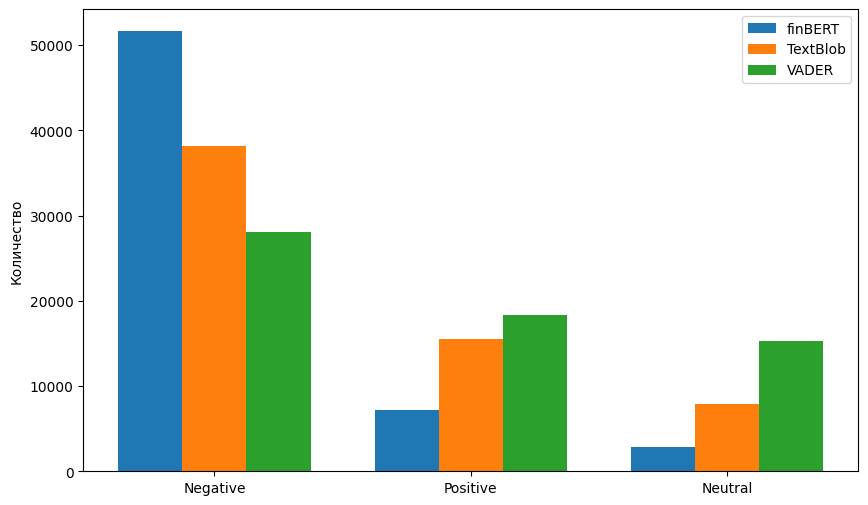

In [15]:
# Подсчет количества классов для каждой модели
finBERT_counts = df_est['finBERT'].value_counts()
textblob_counts = df_est['textblob_polarity'].value_counts()
vader_counts = df_est['vader_compound'].value_counts()

# Создание графика
plt.figure(figsize=(10, 6))
bar_width = 0.25
x = np.arange(3)

plt.bar(x - bar_width, finBERT_counts.values, width=bar_width, label='finBERT')
plt.bar(x, textblob_counts.values, width=bar_width, label='TextBlob')
plt.bar(x + bar_width, vader_counts.values, width=bar_width, label='VADER')

plt.xticks(x, ['Negative', 'Positive', 'Neutral'])
plt.ylabel('Количество')
plt.legend()
plt.show()

Видно, что все библиотеки показывают преимущетсво негативных публикаций по сравнению с другими, а библиотека finBERT чаще остальных присваивает негативную тональность публикациям.

# Голосование между библиотеками

Если 2 из 3 библиотек дают одинаковый результат, берем его. Если спорно, то отдаем предпочтение finBERT

In [17]:
def voting(row):
    # Создадим список настроений из трех разных анализаторов
    sentiments = [row['finBERT'], row['textblob_polarity'], row['vader_compound']]
    # Подсчитаем, сколько раз каждое настроение встречается в списке
    counts = {'Negative': sentiments.count('Negative'), 'Positive': sentiments.count('Positive'), 'Neutral': sentiments.count('Neutral')}
    # Найдем максимальное количество голосов, отданных за любое настроение
    max_count = max(counts.values())
    # Создадим список настроений, получивших максимальное количество голосов (победителей)
    winners = [key for key, value in counts.items() if value == max_count]
    # Если есть только один победитель
    if len(winners) == 1:
        return winners[0]  # Вернуть настроение победителя
    else:
        # Если есть ничья, отдать приоритет finBERT
        if 'finBERT' in sentiments:
            return row['finBERT']  # Вернуть настроение finBERT
        else:
            # Если finBERT не участвует в ничьей, вернуть любое из победивших настроений
            return winners[0]

In [18]:
# Применение функции к каждой строке
df_est['voting_result'] = df_est.apply(voting, axis=1)

## Расчет индекса настроений

Индекс настроений можно рассчитать по следующей формуле:

$$
\text{YTIndex} = \text{Positive}_t - \text{Negative}_t
$$

где:

*   $\text{Positive}_t$ — количество комментариев, классифицированных как положительные за день t.
*   $\text{Negative}_t$ — количество комментариев, классифицированных как отрицательные за день t.

In [18]:
# Группировка данных из df_est по столбцу 'timestamp' и применение функции к каждой группе
df_grouped = df_est.groupby('timestamp').apply(lambda x: ((x['voting_result'].eq('Positive').sum() - x['voting_result'].eq('Negative').sum())))
# Преобразование сгруппированных данных в новый DataFrame pandas с именем index_df, присваивая столбцу имя 'sentiment_index'
index_df = pd.DataFrame(df_grouped, columns=['sentiment_index'])

In [38]:
# Для месяцев***
# Добавление нового столбца 'month' на основе 'timestamp'
df_est['month'] = df_est['timestamp'].dt.to_period('M')

# Функция для расчёта настроения: положительные минус отрицательные значения
def calculate_sentiment(group):
    return group['voting_result'].eq('Positive').sum() - group['voting_result'].eq('Negative').sum()

# Группировка по столбцу 'month' и применение функции calculate_sentiment для каждой группы
monthly_sentiment = df_est.groupby('month').apply(calculate_sentiment)

# Преобразование результатов в DataFrame с именем index_df и столбцом 'sentiment_index'
index_df = pd.DataFrame(monthly_sentiment, columns=['sentiment_index'])

In [40]:
index_df

,sentiment_index
month,
2015-11,-23
2015-12,-68
2016-01,-19
2016-02,5
2016-03,41
...,...
2024-09,-103
2024-10,-158
2024-11,67


Заполним пропуски по принципу, что при отсутствии публикаций в день берется значение 0

In [41]:
# 1. Создать полный диапазон дат
start_date = index_df.index.min()
end_date = index_df.index.max()
full_date_range = pd.date_range(start=start_date, end=end_date, freq='D')
# 2. Переиндексировать DataFrame с полным диапазоном дат
index_df = index_df.reindex(full_date_range)
# 3. Заполнить отсутствующие значения в столбце sentiment_index нулями
index_df['sentiment_index'] = index_df['sentiment_index'].fillna(0)
# 4. Присвоить индексу имя 'timestamp'
index_df.index.name = 'timestamp'
print(index_df)

ValueError: Cannot convert Period to Timestamp unambiguously. Use to_timestamp

## Рассчет волатильности

In [23]:
import arch
from arch import arch_model

In [49]:
garch_model = arch_model(index_df['sentiment_index'], vol='Garch', p=2, q=2)
garch_results = garch_model.fit(update_freq=1, disp='off') # Отключаем вывод fit
index_df['volatility'] = (garch_results.conditional_volatility)

In [50]:
index_df = index_df.reset_index()

In [51]:
index_df

,index,month,sentiment_index,volatility
0,0,2015-11,-23,34.219711
1,1,2015-12,-68,28.660422
2,2,2016-01,-19,36.696787
3,3,2016-02,5,28.794818
4,4,2016-03,41,36.450043
...,...,...,...,...
106,106,2024-09,-103,40.197330
107,107,2024-10,-158,53.298921
108,108,2024-11,67,83.621264
109,109,2024-12,-62,68.185610


In [52]:
index_df['month'] = [str(i) for i in index_df['month']]

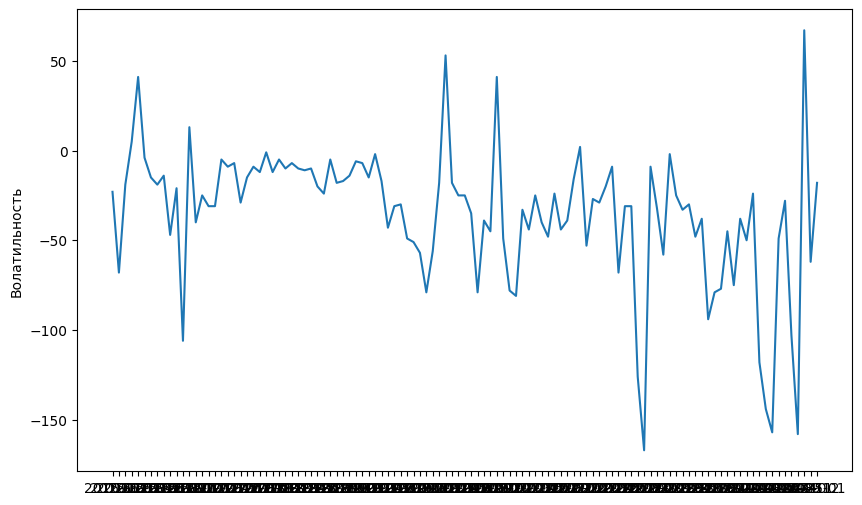

In [64]:
plt.figure(figsize=(10,6))
plt.plot(index_df['month'], index_df['sentiment_index'], label='Волатильность')
# plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gcf().autofmt_xdate()
# plt.title('Волатильность на основе модели GARCH(1,1)')
plt.ylabel('Волатильность')
plt.show()

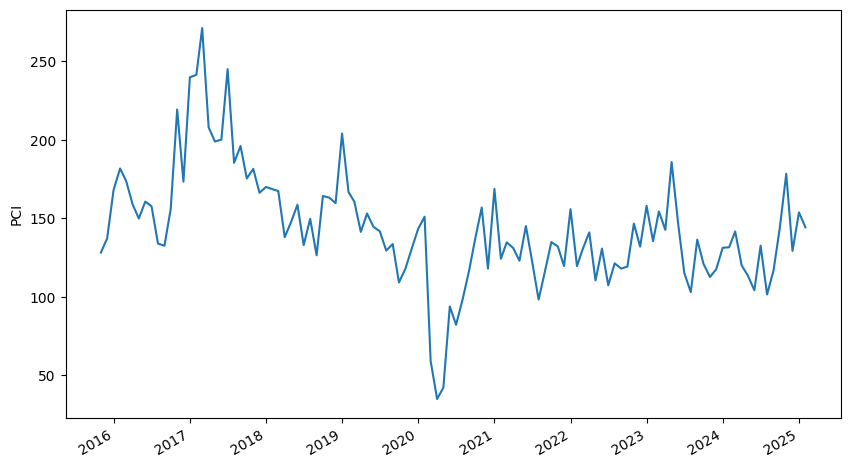

In [61]:
df_PCI = pd.read_excel('partisan-conflict (4).xlsx')
plt.figure(figsize=(10,6))
plt.plot(df_PCI['Date'], df_PCI['Partisan Conflict'], label='Волатильность')
plt.gcf().autofmt_xdate()
plt.ylabel('PCI')
plt.show()

In [16]:
y_max = index_df['volatility'].max()
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(index_df.index), index_df['volatility'], color='black')
plt.ylabel('Волатильность индекса')
plt.xticks(rotation=45)
plt.axvline(x=pd.to_datetime('2016-11-08'), color='red', linestyle='--', label='Выборы президента США')
plt.text(x=pd.to_datetime('2016-11-08') + pd.Timedelta(days=20), y=y_max * 0.82,
         s='Выборы президента США 2016',
         color='red',
         rotation=90,
         verticalalignment='center',
         horizontalalignment='left')
plt.axvline(x=pd.to_datetime('2020-11-03'), color='red', linestyle='--')
plt.text(x=pd.to_datetime('2020-11-03') + pd.Timedelta(days=-140), y=y_max * 0.9,
         s='Выборы президента \nСША 2020',
         color='red',
         rotation=90,
         verticalalignment='center',
         horizontalalignment='left')
plt.axvline(x=pd.to_datetime('2024-11-05'), color='red', linestyle='--')
plt.text(x=pd.to_datetime('2024-11-05') + pd.Timedelta(days=40), y=y_max * 0.82,
         s='Выборы президента США 2024',
         color='red',
         rotation=90,
         verticalalignment='center',
         horizontalalignment='left')
plt.axvline(x=pd.to_datetime('2019-09-24'), color='darkviolet', linestyle='--')
plt.text(x=pd.to_datetime('2019-09-24') + pd.Timedelta(days=-80), y=y_max * 0.84,
         s='Первый импичмент Трампу',
         color='darkviolet',
         rotation=90,
         verticalalignment='center',
         horizontalalignment='left')
plt.axvline(x=pd.to_datetime('2021-01-13'), color='darkviolet', linestyle='--')
plt.text(x=pd.to_datetime('2021-01-13') + pd.Timedelta(days=30), y=y_max * 0.86,
         s='Второй импичмент Трампу',
         color='darkviolet',
         rotation=90,
         verticalalignment='center',
         horizontalalignment='left')
plt.axvline(x=pd.to_datetime('2023-09-12'), color='darkviolet', linestyle='--')
plt.text(x=pd.to_datetime('2023-09-12') + pd.Timedelta(days=15), y=y_max * 0.93,
         s='Расследование \nимпичмента \nДжо Байдена',
         color='darkviolet',
         rotation=90,
         verticalalignment='center',
         horizontalalignment='left')
plt.axvline(x=pd.to_datetime('2022-11-08'), color='darkviolet', linestyle='--')
plt.text(x=pd.to_datetime('2022-11-08') + pd.Timedelta(days=-160), y=y_max * 0.93,
         s='Промежуточные \nвыборы в США',
         color='darkviolet',
         rotation=90,
         verticalalignment='center',
         horizontalalignment='left')
plt.tight_layout()
plt.show()

NameError: name 'index_df' is not defined

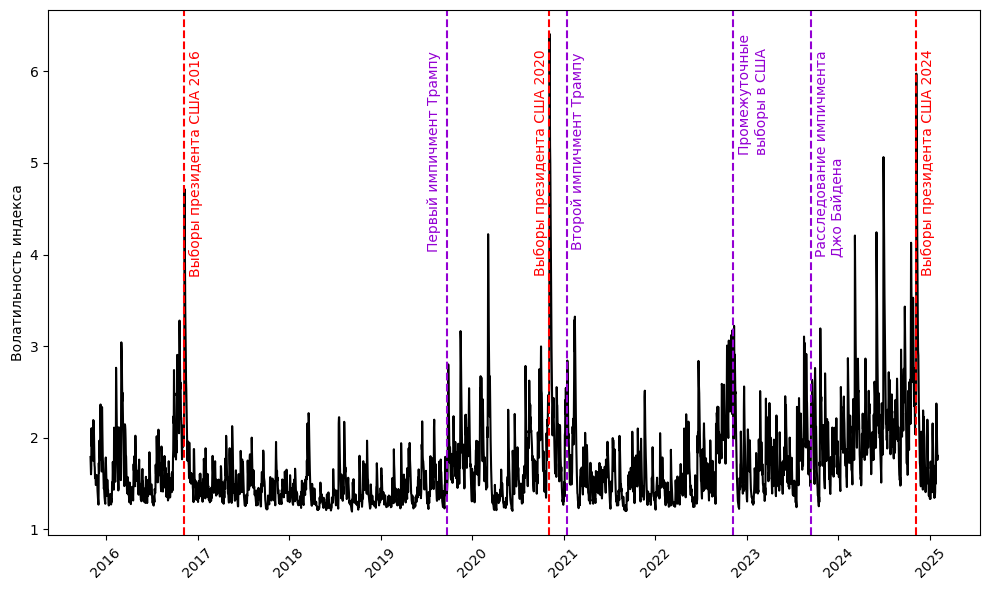

In [29]:
import numpy as np

# Вычисление 80% квантиля
quantile_80 = index_df['volatility'].quantile(0.80)

plt.figure(figsize=(12, 7))
ax = plt.gca()

# Основной график волатильности
main_line = ax.plot(pd.to_datetime(index_df.index), 
                    index_df['volatility'], 
                    color='navy',
                    linewidth=1.5,
                    label='Волатильность индекса')

# Линия 80% квантиля
ax.axhline(y=quantile_80, 
           color='darkorange', 
           linestyle=':', 
           linewidth=2,
           alpha=0.7,
           label='80-й перцентиль')

# Заливка зон высокой волатильности
ax.fill_between(pd.to_datetime(index_df.index),
                index_df['volatility'],
                quantile_80,
                where=(index_df['volatility'] >= quantile_80),
                color='tomato',
                alpha=0.15,
                interpolate=True)

# Аннотация для квантиля
ax.text(x=pd.to_datetime(index_df.index[-1]) + pd.Timedelta(days=30),
        y=quantile_80,
        s=f'80% квантиль: {quantile_80:.2f}',
        color='darkorange',
        va='center',
        ha='left',
        fontsize=9,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# Вертикальные маркеры событий (ваш исходный код)
# ... [Ваш код с вертикальными линиями и текстом] ...

# Форматирование осей
ax.set_ylabel('Волатильность индекса', fontsize=12)
ax.set_title('Динамика политической неопределённости\nс выделением экстремальных значений', pad=20)
ax.tick_params(axis='x', rotation=45)
ax.grid(True, linestyle=':', alpha=0.7)

# Легенда
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=[main_line[0], 
                 plt.Line2D([0], [0], color='darkorange', linestyle=':', linewidth=2),
                 plt.Rectangle((0,0),1,1, fc='tomato', alpha=0.15)],
        labels=['Волатильность', '80% квантиль', 'Зона высокой нестабильности'],
        loc='upper left',
        frameon=False)

plt.tight_layout()
plt.show()


In [28]:
import numpy as np

# Вычисление 80% квантиля
quantile_80 = index_df['volatility'].quantile(0.80)

plt.figure(figsize=(12, 7))
ax = plt.gca()

# Основной график волатильности
main_line = ax.plot(pd.to_datetime(index_df.index), 
                    index_df['volatility'], 
                    color='navy',
                    linewidth=1.5,
                    label='Волатильность индекса')

# Линия 80% квантиля
ax.axhline(y=quantile_80, 
           color='darkorange', 
           linestyle=':', 
           linewidth=2,
           alpha=0.7,
           label='80-й перцентиль')

# Заливка зон высокой волатильности
ax.fill_between(pd.to_datetime(index_df.index),
                index_df['volatility'],
                quantile_80,
                where=(index_df['volatility'] >= quantile_80),
                color='tomato',
                alpha=0.15,
                interpolate=True)

# Аннотация для квантиля
ax.text(x=pd.to_datetime(index_df.index[-1]) + pd.Timedelta(days=30),
        y=quantile_80,
        s=f'80% квантиль: {quantile_80:.2f}',
        color='darkorange',
        va='center',
        ha='left',
        fontsize=9,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# Вертикальные маркеры событий (ваш исходный код)
# ... [Ваш код с вертикальными линиями и текстом] ...

# Форматирование осей
ax.set_ylabel('Волатильность индекса', fontsize=12)
ax.set_title('Динамика политической неопределённости\nс выделением экстремальных значений', pad=20)
ax.tick_params(axis='x', rotation=45)
ax.grid(True, linestyle=':', alpha=0.7)

# Легенда
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=[main_line[0], 
                 plt.Line2D([0], [0], color='darkorange', linestyle=':', linewidth=2),
                 plt.Rectangle((0,0),1,1, fc='tomato', alpha=0.15)],
        labels=['Волатильность', '80% квантиль', 'Зона высокой нестабильности'],
        loc='upper left',
        frameon=False)

plt.tight_layout()
plt.show()


NameError: name 'index_df' is not defined

In [32]:
index_df = df

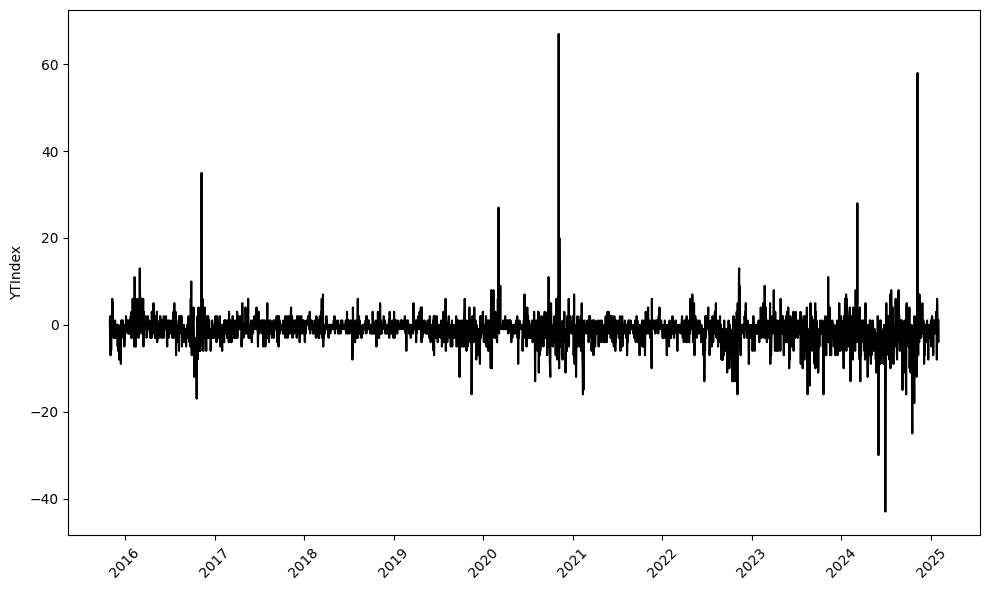

In [31]:
y_max = index_df['sentiment_index'].max()
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(index_df.index), index_df['sentiment_index'], color='black')
plt.ylabel('YTIndex')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
# Проведение теста Дики-Фуллера
result = adfuller(index_df['volatility'])
# Вывод результатов
print('Тест Дики-Фуллера:')
print(f'p-value: {result[1]}')
if result[1] < 0.05:
    print('Ряд стационарен.')
else:
    print('Ряд нестационарен.')

Тест Дики-Фуллера:
p-value: 3.4601240015236267e-06
Ряд стационарен.


In [33]:
from scipy.stats import shapiro, kstest, normaltest
data = (index_df['sentiment_index'])

# Тест Шапиро-Уилка
shapiro_test = shapiro(data)
print("Тест Шапиро-Уилка:")
print("Статистика теста:", shapiro_test.statistic)
print("P-значение:", shapiro_test.pvalue)
if shapiro_test.pvalue > 0.05:
    print("Образец выглядит нормальным (нельзя отвергнуть нулевую гипотезу)")
else:
    print("Образец не выглядит нормальным (отвергается нулевая гипотеза)")

# Тест Колмогорова-Смирнова
kstest_test = kstest(data, 'norm')
print("\nТест Колмогорова-Смирнова:")
print("Статистика теста:", kstest_test.statistic)
print("P-значение:", kstest_test.pvalue)
if kstest_test.pvalue > 0.05:
    print("Образец выглядит нормальным (нельзя отвергнуть нулевую гипотезу)")
else:
    print("Образец не выглядит нормальным (отвергается нулевая гипотеза)")

# Тест Д'Агостино-Пирсона
normaltest_test = normaltest(data)
print("\nТест Д'Агостино-Пирсона:")
print("Статистика теста:", normaltest_test.statistic)
print("P-значение:", normaltest_test.pvalue)
if normaltest_test.pvalue > 0.05:
    print("Образец выглядит нормальным (нельзя отвергнуть нулевую гипотезу)")
else:
    print("Образец не выглядит нормальным (отвергается нулевая гипотеза)")


Тест Шапиро-Уилка:
Статистика теста: 0.7349186041047502
P-значение: 7.7200499550893455e-59
Образец не выглядит нормальным (отвергается нулевая гипотеза)

Тест Колмогорова-Смирнова:
Статистика теста: 0.399628769737182
P-значение: 0.0
Образец не выглядит нормальным (отвергается нулевая гипотеза)

Тест Д'Агостино-Пирсона:
Статистика теста: 2646.4355876488653
P-значение: 0.0
Образец не выглядит нормальным (отвергается нулевая гипотеза)


In [38]:
index_df.to_csv('index_df.csv', sep = '§')

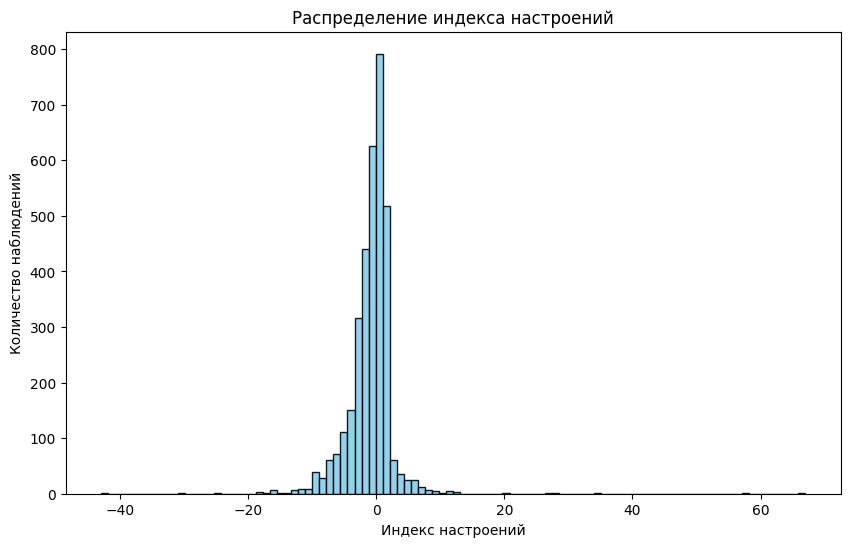

In [34]:
def plot_sentiment_histogram(index_df):
    # Создание гистограммы
    plt.figure(figsize=(10, 6))
    plt.hist(index_df['sentiment_index'], bins=100, alpha=0.9, color='skyblue', edgecolor='black')
    plt.xlabel('Индекс настроений')
    plt.ylabel('Количество наблюдений')
    plt.title('Распределение индекса настроений')
    plt.show()
plot_sentiment_histogram(index_df)

In [35]:
from scipy.stats import skew, kurtosis
skewness = skew(index_df['sentiment_index'])
kurt = kurtosis(index_df['sentiment_index'])
print(f"Асимметрия: {skewness}")
print(f"Эксцесс: {kurt}")

Асимметрия: 2.7353106628398116
Эксцесс: 70.48249734489404


In [36]:
for i in df_est[(df_est['timestamp'] == '2020-03-04') & (df_est['voting_result'] == 'Negative')]['text']:
    print(i)

Breaking down the allocation of delegates l ABC News
Trump: 'I Don't Care Who Wins' Super Tuesday Primary Elections | NBC News
Joe Biden Backers May Be Motivated By President Donald Trump's Apparent Fear | MSNBC


In [1732]:
sp500 = pd.read_csv('sp500.csv', skiprows = 2).iloc[:,:2]
sp500.columns = ['Date', 'Price']
brent = pd.read_csv('brent.csv', skiprows = 2).iloc[:,:2]
brent.columns = ['Date', 'Price']
Urals = pd.read_csv('Прошлые данные - Спотовая цена сырой нефти Urals.csv', skiprows = 0).iloc[:,:2]
Urals.columns = ['Date', 'Price']
gold = pd.read_csv('Gold_price.csv', skiprows = 2).iloc[:,:2]
gold.columns = ['Date', 'Price']
SSE = pd.read_csv('SSE_Composite_Index.csv', skiprows = 2).iloc[:,:2]
SSE.columns = ['Date', 'Price']

In [1733]:
# Предположим, что у тебя есть DataFrame с колонками 'sentiment_index' и 'Return'
# Замена запятых на точки в числовых столбцах
for col in Urals.columns:
    if Urals[col].dtype == 'object':  # Если столбец содержит строки
        Urals[col] = Urals[col].str.replace(',', '.')
        
    # Преобразование столбца в float после замены запятых на точки
    try:
        Urals[col] = Urals[col].astype(float)
    except ValueError:
        pass  # Если преобразование не удалось, оставляем столбец как есть

## Добавим данные доходностей:

In [1736]:
# Преобразование даты в тип datetime
sp500['Date'] = pd.to_datetime(sp500['Date'])
brent['Date'] = pd.to_datetime(brent['Date'])
Urals['Date'] = pd.to_datetime(Urals['Date'])
gold['Date'] = pd.to_datetime(gold['Date'])
SSE['Date'] = pd.to_datetime(SSE['Date'])
# Сортировка по дате
sp500 = sp500.sort_values(by='Date')
brent = brent.sort_values(by='Date')
Urals = Urals.sort_values(by='Date')
gold = gold.sort_values(by='Date')
SSE = SSE.sort_values(by='Date')
# Рассчитаем доходность
sp500['Return'] = sp500['Price'].pct_change()
brent['Return'] = brent['Price'].pct_change()
Urals['Return'] = Urals['Price'].pct_change()
gold['Return'] = gold['Price'].pct_change()
SSE['Return'] = SSE['Price'].pct_change()

In [1737]:
sp500.set_index('Date', inplace=True)
brent.set_index('Date', inplace=True)
Urals.set_index('Date', inplace=True)
gold.set_index('Date', inplace=True)
SSE.set_index('Date', inplace=True)

In [1739]:
# Добавление Series в index_df
index_df = index_df.assign(Return_sp500=sp500['Return'],
                           Return_brent=brent['Return'],
                           Return_Urals=Urals['Return'],
                           Return_gold=gold['Return'],
                           Return_SSE=SSE['Return'])

In [1745]:
# Интерполяция оставшихся NaN
index_df = index_df.interpolate(method='linear', limit_direction='both')
print(index_df.head())

            sentiment_index  volatility  Return_sp500  Return_brent  \
timestamp                                                             
2015-11-01         0.000100    0.017608      0.011874     -0.015537   
2015-11-02        -0.000200    0.017173      0.011874     -0.015537   
2015-11-03         0.000199    0.016371      0.002728      0.035868   
2015-11-04        -0.000698    0.016743     -0.003545     -0.038781   
2015-11-05        -0.000100    0.019042     -0.001132     -0.012351   

            Return_Urals  Return_gold  Return_SSE  sentiment_quantile  
timestamp                                                              
2015-11-01      0.028345    -0.004993   -0.016992                   7  
2015-11-02      0.028345    -0.004993   -0.016992                   6  
2015-11-03      0.028345    -0.019018   -0.002523                   6  
2015-11-04      0.028345    -0.006911    0.043099                   6  
2015-11-05      0.028345    -0.001898    0.018262                   7 

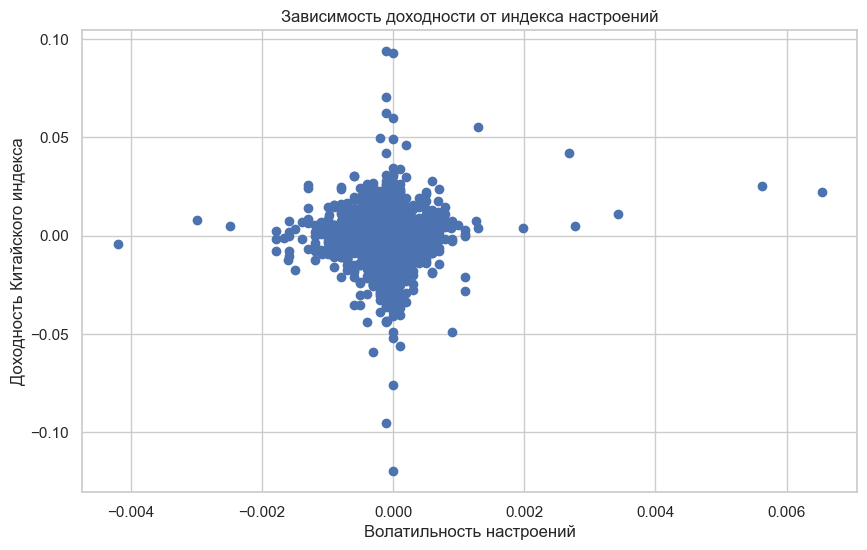

In [1746]:
# Создание графика
plt.figure(figsize=(10, 6))
plt.scatter(index_df['sentiment_index'], index_df['Return_sp500'])
plt.xlabel('Волатильность настроений')
plt.ylabel('Доходность Китайского индекса')
plt.title('Зависимость доходности от индекса настроений')
plt.show()

In [1747]:
# Разделение данных на 10 квантилей
index_df['sentiment_quantile'] = pd.qcut(index_df['volatility'], q=10, labels=False)

In [1748]:
index_df.head(1)

,sentiment_index,volatility,Return_sp500,Return_brent,Return_Urals,Return_gold,Return_SSE,sentiment_quantile
timestamp,,,,,,,,
2015-11-01,0.0001,0.017608,0.011874,-0.015537,0.028345,-0.004993,-0.016992,7


In [1749]:
# Расчет средней доходности для каждого квантиля
average_returns = index_df.groupby('sentiment_quantile')['Return_sp500'].mean()

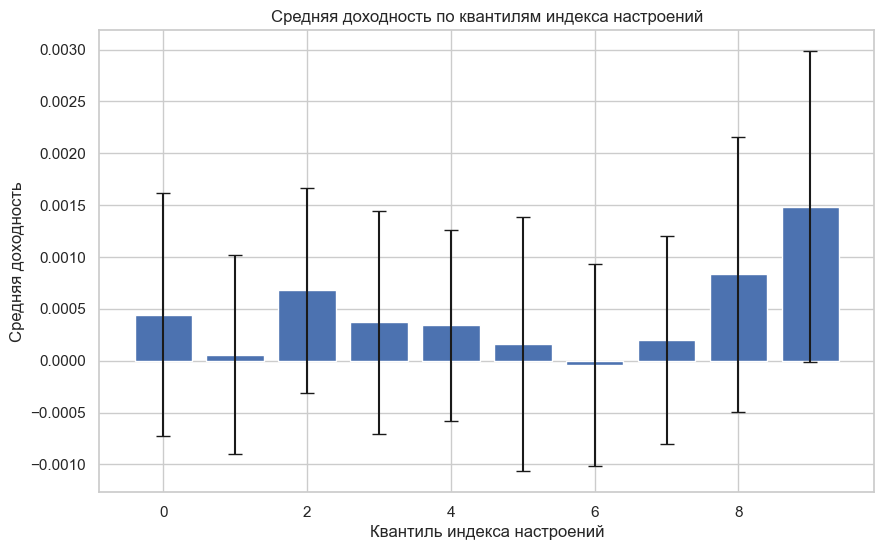

In [1750]:
# Расчет доверительных интервалов для средней доходности
from scipy import stats

def confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

# Расчет средней доходности и доверительных интервалов для каждого квантиля
quantile_data = []
for i in range(10):
    quantile_returns = index_df[index_df['sentiment_quantile'] == i]['Return_sp500']
    mean, lower, upper = confidence_interval(quantile_returns)
    quantile_data.append((mean, lower, upper))

# Визуализация средней доходности с доверительными интервалами
plt.figure(figsize=(10, 6))
means = [x[0] for x in quantile_data]
lower_bounds = [x[1] for x in quantile_data]
upper_bounds = [x[2] for x in quantile_data]

plt.bar(range(10), means, yerr=[np.array(means) - np.array(lower_bounds), np.array(upper_bounds) - np.array(means)], capsize=5)
plt.xlabel('Квантиль индекса настроений')
plt.ylabel('Средняя доходность')
plt.title('Средняя доходность по квантилям индекса настроений')
plt.show()

In [1304]:
index_df.head(1)

,sentiment_index,volatility,Return_sp500,Return_brent,Return_Urals,Return_gold,Return_SSE,sentiment_quantile
timestamp,,,,,,,,
2015-11-01,0.00001,0.000034,0.011874,-0.015537,0.028345,-0.004993,-0.016992,7


In [1752]:
from statsmodels.tsa.stattools import grangercausalitytests

# Проведение теста Грейнджера для разных лагов
max_lag = 5  # Максимальное количество лагов
print(f'Тест Грейнджера для лагов от 1 до {max_lag}:\n')

test_result = grangercausalitytests(index_df[['sentiment_index', 'Return_sp500']], maxlag=max_lag, verbose=False)

# Обработка результатов
for lag, result in test_result.items():
    test_stats = result[0]  # Первый элемент — словарь с тестовыми статистиками
    ssr_chi2_pvalue = test_stats['ssr_chi2test'][1]  # p-value для chi-square теста
    lrtest_pvalue = test_stats['lrtest'][1]  # p-value для likelihood ratio теста
    
    print(f'Лаг: {lag}')
    print(f'P-value (ssr_chi2test) для Return -> sentiment_index: {ssr_chi2_pvalue:.4f}')
    print(f'P-value (lrtest) для Return -> sentiment_index: {lrtest_pvalue:.4f}')
    
    if ssr_chi2_pvalue < 0.05:
        print('sentiment_index является причиной Return_sp500 (на основе ssr_chi2test).')
    else:
        print('sentiment_index НЕ является причиной Return_sp500 (на основе ssr_chi2test).')
    
    if lrtest_pvalue < 0.05:
        print('sentiment_index является причиной Return_sp500 (на основе lrtest).')
    else:
        print('sentiment_index НЕ является причиной Return_sp500 (на основе lrtest).')
    
    print()


Тест Грейнджера для лагов от 1 до 5:

Лаг: 1
P-value (ssr_chi2test) для Return -> sentiment_index: 0.8052
P-value (lrtest) для Return -> sentiment_index: 0.8052
sentiment_index НЕ является причиной Return_sp500 (на основе ssr_chi2test).
sentiment_index НЕ является причиной Return_sp500 (на основе lrtest).

Лаг: 2
P-value (ssr_chi2test) для Return -> sentiment_index: 0.4818
P-value (lrtest) для Return -> sentiment_index: 0.4819
sentiment_index НЕ является причиной Return_sp500 (на основе ssr_chi2test).
sentiment_index НЕ является причиной Return_sp500 (на основе lrtest).

Лаг: 3
P-value (ssr_chi2test) для Return -> sentiment_index: 0.6996
P-value (lrtest) для Return -> sentiment_index: 0.6997
sentiment_index НЕ является причиной Return_sp500 (на основе ssr_chi2test).
sentiment_index НЕ является причиной Return_sp500 (на основе lrtest).

Лаг: 4
P-value (ssr_chi2test) для Return -> sentiment_index: 0.7838
P-value (lrtest) для Return -> sentiment_index: 0.7839
sentiment_index НЕ является п

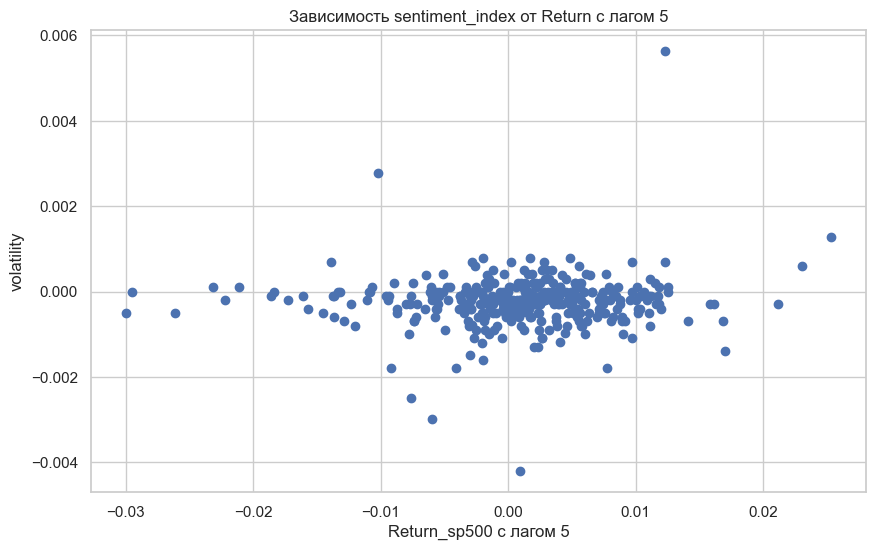

In [1754]:
# Создание графика рассеяния с лагом 5
plt.figure(figsize=(10, 6))
plt.scatter(index_df[(index_df.index > '2024-01-01') & (index_df.index < '2025-01-01')]['Return_sp500'].shift(1), 
            index_df[(index_df.index > '2024-01-01') & (index_df.index < '2025-01-01')]['sentiment_index'])
plt.xlabel('Return_sp500 с лагом 5')
plt.ylabel('volatility')
plt.title('Зависимость sentiment_index от Return с лагом 5')
plt.show()

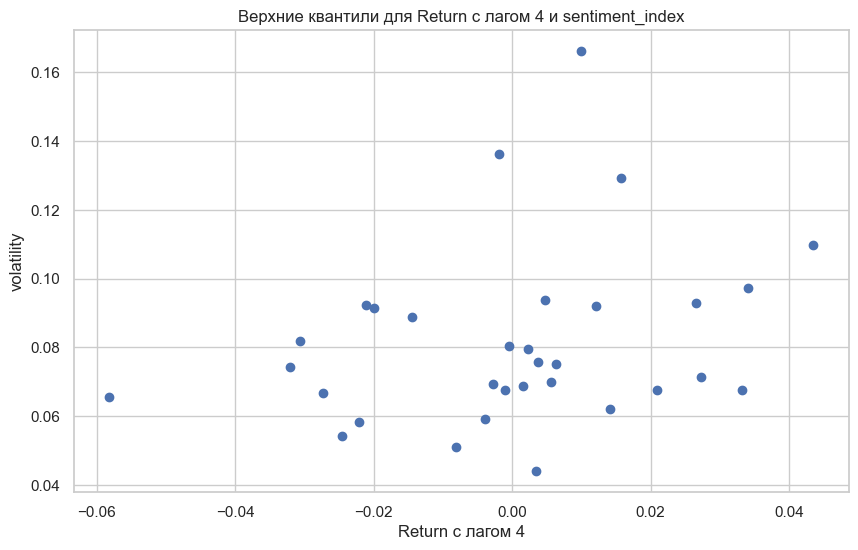

In [1424]:
lag = 4
upper_quantile = 0.9
lagged_returns = []
for lag in range(4, 5):
    lagged_return = index_df[(index_df.index > '2024-01-01') & (index_df.index < '2025-01-01')]['Return_Urals'].shift(lag)
    lagged_returns.append(lagged_return)
    upper_quantile_value = np.quantile(lagged_return.dropna(), upper_quantile)
    filtered_data = index_df[(index_df.index > '2024-01-01') & (index_df.index < '2025-01-01')][(lagged_return > upper_quantile_value)]
    plt.figure(figsize=(10, 6))
    plt.scatter(filtered_data['Return_Urals'].shift(lag), filtered_data['volatility'])
    plt.xlabel(f'Return с лагом {lag}')
    plt.ylabel('volatility')
    plt.title(f'Верхние квантили для Return с лагом {lag} и sentiment_index')
    plt.show()

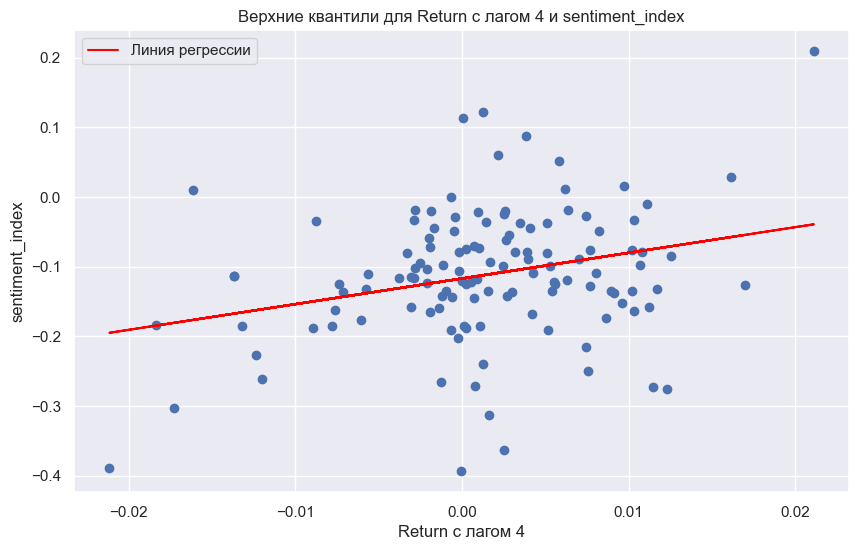

In [462]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Рассчитаем верхние квантили для каждого лага
upper_quantile = 0.45  # Верхний квантиль (75%)
lagged_returns = []

for lag in range(4, 5):  # Проверяем лаги от 1 до 5
    lagged_return = merged_df[(merged_df.index > '2024-01-01') & (merged_df.index < '2024-12-10')]['Return'].shift(lag)
    lagged_returns.append(lagged_return)
    
    # Рассчитаем верхний квантиль для текущего лага
    upper_quantile_value = np.nanquantile(lagged_return.dropna(), upper_quantile)
    
    # Отфильтруем данные, чтобы оставить только точки выше верхнего квантиля
    filtered_data = merged_df[(merged_df.index > '2024-01-01') & (merged_df.index < '2024-12-10')][(lagged_return > upper_quantile_value)]
    
    # Удаление NaN из отфильтрованных данных
    filtered_data = filtered_data.dropna()
    
    # Построим график рассеяния для отфильтрованных данных
    plt.figure(figsize=(10, 6))
    plt.scatter(filtered_data['Return'].shift(lag), filtered_data['sentiment_index'])
    
    # Добавление линии регрессии
    x = filtered_data['Return'].shift(lag).values.reshape(-1, 1)
    y = filtered_data['sentiment_index'].values
    
    # Удаление NaN из x и y
    mask = ~np.isnan(x).any(axis=1) & ~np.isnan(y)
    x = x[mask]
    y = y[mask]
    
    if len(x) > 0 and len(y) > 0:
        model = LinearRegression()
        model.fit(x, y)
        y_pred = model.predict(x)
        
        plt.plot(x, y_pred, color='red', label='Линия регрессии')
    
    plt.xlabel(f'Return с лагом {lag}')
    plt.ylabel('sentiment_index')
    plt.title(f'Верхние квантили для Return с лагом {lag} и sentiment_index')
    plt.legend()
    plt.show()


In [410]:
merged_df

,sentiment_index,Return,sentiment_quantile
2015-11-02,-0.041667,0.011874,5
2015-11-03,-0.067568,0.002728,4
2015-11-04,-0.171429,-0.003545,1
2015-11-05,-0.174603,-0.001132,1
2015-11-06,-0.238806,-0.000348,0
...,...,...,...
2025-01-27,-0.126866,-0.014581,2
2025-01-28,-0.148148,0.009218,1
2025-01-29,-0.136364,-0.004679,2
2025-01-30,-0.303191,0.005275,0


In [411]:
# Рассчитаем корреляцию для каждого квантиля
for quantile in merged_df['sentiment_quantile'].unique():
    quantile_data = merged_df[merged_df['sentiment_quantile'] == quantile]
    correlation = quantile_data['sentiment_index'].corr(quantile_data['Return'])
    print(f'Квантиль: {quantile}, Корреляция: {correlation:.4f}')

Квантиль: 5, Корреляция: 0.0068
Квантиль: 4, Корреляция: -0.0773
Квантиль: 1, Корреляция: 0.0973
Квантиль: 0, Корреляция: 0.0219
Квантиль: 6, Корреляция: 0.0738
Квантиль: 3, Корреляция: -0.0512
Квантиль: 2, Корреляция: 0.0089


# Блок с индексами неопределенности

In [920]:
df_pci = pd.read_excel('partisan-conflict (3).xlsx')
df_epu = pd.read_csv('USEPUINDXD.csv')

In [921]:
df_epu.columns = ['Date', 'USEPU']
df_pci.columns = ['Date', 'PCI']
df_epu['timestamp'] = pd.to_datetime(df_epu['Date'])
df_pci['timestamp'] = pd.to_datetime(df_pci['Date'])

In [922]:
df_epu = df_epu.set_index('timestamp')
df_pci = df_pci.set_index('timestamp')

In [925]:
df_epu = df_epu.iloc[:,1:]
df_pci = df_pci.iloc[:,1:]

In [926]:
index_df.iloc[:,:1]

,sentiment_index
timestamp,
2015-11-01,0.066667
2015-11-02,-0.083333
2015-11-03,0.054054
2015-11-04,-0.218750
2015-11-05,-0.040000
...,...
2025-01-27,0.000000
2025-01-28,0.111111
2025-01-29,-0.222222


,sentiment_index
timestamp,
2015-11-01,0.066667
2015-11-02,-0.083333
2015-11-03,0.054054
2015-11-04,-0.218750
2015-11-05,-0.040000
...,...
2025-01-27,0.000000
2025-01-28,0.111111
2025-01-29,-0.222222


In [865]:
# 1. Создайте столбец с датой в формате 'YYYY-MM-01'
months_dict = {'January': 1, 'February': 2, 
               'March': 3, 'April': 4, 
               'May': 5, 'June': 6, 
               'July': 7, 'August': 8, 
               'September': 9, 'October': 10, 
               'November': 11, 'December': 12}

df_pci['Month_Number'] = df_pci['Month'].map(months_dict)
df_pci['Date'] = pd.to_datetime(df_pci['Year'].astype(str) + '-' + df_pci['Month_Number'].astype(str) + '-01', format='%Y-%m-%d')

# 2. Установите столбец 'Date' в качестве индекса
df_pci = df_pci.set_index('Date')

# 3. Удалите ненужные столбцы (Year, Month, Month_Number)
df_pci = df_pci.drop(['Year', 'Month', 'Month_Number'], axis=1)

# Вывод первых нескольких строк преобразованного DataFrame
print(df_pci.head())

ValueError: time data "1981-1.0-01" doesn't match format "%Y-%m-%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [39]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import QuantileRegressor
from scipy import stats
import networkx as nx
import matplotlib.pyplot as plt

def quantile_granger_causality(data, y_name, x_name, quantile, maxlag=3):
    """
    Проводит тест Грейнджера в квантиле для определения причинно-следственной связи между двумя временными рядами.
    """

    # 1. Создание лагированных переменных
    y = data[y_name].values
    X = data[[y_name, x_name]].copy()
    for lag in range(1, maxlag + 1):
        X.loc[:, f'{y_name}_L{lag}'] = data[y_name].shift(lag)
        X.loc[:, f'{x_name}_L{lag}'] = data[x_name].shift(lag)

    X = X.dropna()
    y = y[X.index]

    # 2. Квантильная регрессия без ограничений (Unrestricted Model)
    X_unrestricted = X[[col for col in X.columns if x_name not in col or x_name == col]].values
    model_unrestricted = QuantileRegressor(quantile=quantile, fit_intercept=True)
    model_unrestricted.fit(sm.add_constant(X_unrestricted), y)

    # 3. Квантильная регрессия с ограничениями (Restricted Model)
    X_restricted = X[[col for col in X.columns if x_name not in col]].values
    model_restricted = QuantileRegressor(quantile=quantile, fit_intercept=True)
    model_restricted.fit(sm.add_constant(X_restricted), y)

    # 4. F-тест
    df_unrestricted = X_unrestricted.shape[1] + 1
    df_restricted = X_restricted.shape[1] + 1

    predictions_unrestricted = model_unrestricted.predict(sm.add_constant(X_unrestricted))
    predictions_restricted = model_restricted.predict(sm.add_constant(X_restricted))

    ssr_unrestricted = np.sum((y - predictions_unrestricted)**2)
    ssr_restricted = np.sum((y - predictions_restricted)**2)

    # F-статистика
    f_statistic = ((ssr_restricted - ssr_unrestricted) / (df_unrestricted - df_restricted)) / (ssr_unrestricted / (len(y) - df_unrestricted))

    # P-значение (используем F-распределение)
    p_value = 1 - stats.f.cdf(f_statistic, df_unrestricted - df_restricted, len(y) - df_unrestricted)

    results = {'f_statistic': f_statistic, 'p_value': p_value}

    return results, p_value < 0.05

def create_granger_causality_graph(data, variables, quantile, maxlag=3, alpha=0.05):
    """
    Создает граф связности на основе теста Грейнджера.

    Args:
        data (pd.DataFrame): DataFrame с данными.
        variables (list): Список названий переменных для анализа.
        quantile (float): Квантиль для теста Грейнджера.
        maxlag (int): Максимальное количество лагов.
        alpha (float): Уровень значимости для определения причинности.

    Returns:
        nx.DiGraph: Направленный граф, показывающий причинно-следственные связи.
    """

    graph = nx.DiGraph()
    graph.add_nodes_from(variables)

    for i in range(len(variables)):
        for j in range(len(variables)):
            if i != j:
                y_name = variables[i]
                x_name = variables[j]
                results, is_causal = quantile_granger_causality(data.copy(), y_name, x_name, quantile, maxlag)
                if is_causal:
                    graph.add_edge(x_name, y_name)  # x_name влияет на y_name

    return graph

def plot_granger_causality_graph(graph):
    """
    Визуализирует граф причинно-следственных связей Грейнджера.

    Args:
        graph (nx.DiGraph): Направленный граф.
    """

    pos = nx.circular_layout(graph)  # Выбираем layout для графа
    plt.figure(figsize=(10, 8))
    nx.draw(graph, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", arrowsize=20)
    plt.title("Граф причинно-следственных связей Грейнджера")
    plt.show()

# --- Пример использования ---
if __name__ == '__main__':
    # Создаем пример DataFrame (замените своими данными)
    np.random.seed(42)
    num_rows = 100
    data = pd.DataFrame({
        'A': np.random.randn(num_rows),
        'B': np.random.randn(num_rows),
        'C': np.random.randn(num_rows)
    })

    # Задаем параметры
    variables = ['A', 'B', 'C']
    quantile = 0.75
    maxlag = 2
    alpha = 0.05

    # Создаем и визуализируем граф
    granger_graph = create_granger_causality_graph(data, variables, quantile, maxlag, alpha)
    plot_granger_causality_graph(granger_graph)


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


TypeError: '_AxesStack' object is not callable

<Figure size 1000x800 with 0 Axes>